## **The Dataset**

The dataset is a CSV file named `airbnb.csv`, which contains data on airbnb listings in the state of New York. 

It contains the following columns:

- `listing_id`: The unique identifier for a listing
- `description`: The description used on the listing
- `host_id`: Unique identifier for a host
- `host_name`: Name of host
- `neighbourhood_full`: Name of boroughs and neighbourhoods
- `coordinates`: Coordinates of listing _(latitude, longitude)_
- `Listing added`: Date of added listing
- `room_type`: Type of room 
- `rating`: Rating from 0 to 5.
- `price`: Price per night for listing
- `number_of_reviews`: Amount of reviews received 
- `last_review`: Date of last review
- `reviews_per_month`: Number of reviews per month
- `availability_365`: Number of days available per year
- `Number of stays`: Total number of stays thus far






# let's import libraries and read the dataset

In [ ]:
# Import libraries 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno
import datetime as dt

# everytime when we start - we will clear the output
# do not copy this line if you are running this locally
from google.colab import output
output.clear()

In [ ]:
# Read in the dataset
airbnb = pd.read_csv('https://github.com/adelnehme/python-for-spreadsheet-users-webinar/blob/master/datasets/airbnb.csv?raw=true', index_col = 'Unnamed: 0')

# Inspecting data to identify potential problems (cleaning/bias) using simple pandas and visualizations

In [ ]:
# Print the header of the DataFrame 
airbnb.head(-5)

,listing_id,name,host_id,host_name,neighbourhood_full,coordinates,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added
0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,"Brooklyn, Flatlands","(40.63222, -73.93398)",Private room,45$,10,2018-12-12,0.70,85,4.100954,12.0,0.609432,2018-06-08
1,22005115,Two floor apartment near Central Park,82746113,Cecilia,"Manhattan, Upper West Side","(40.78761, -73.96862)",Entire home/apt,135$,1,2019-06-30,1.00,145,3.367600,1.2,0.746135,2018-12-25
2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,"Brooklyn, Brooklyn Heights","(40.7007, -73.99517)",Entire home/apt,150$,0,NaN,NaN,65,NaN,NaN,NaN,2018-08-15
3,6425850,"Spacious, charming studio",32715865,Yelena,"Manhattan, Upper West Side","(40.79169, -73.97498)",Entire home/apt,86$,5,2017-09-23,0.13,0,4.763203,6.0,0.769947,2017-03-20
4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,"Manhattan, Lower East Side","(40.71884, -73.98354)",Private room,160$,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10009,1474752,Dope Williamsburg Apartment,2259113,Ange,"Brooklyn, Williamsburg","(40.71215, -73.95636999999998)",Private room,NaN,23,2019-05-06,0.32,159,3.962641,27.6,0.734784,2018-10-31
10010,22016391,Your own Loft/gallery in Bushwick!,43872938,Shir,"Brooklyn, Bushwick","(40.69264, -73.90485)",Private room,NaN,3,2018-04-09,0.17,0,3.472408,3.6,0.633199,2017-10-04
10011,165461,Couldn't Be Closer To Columbia Uni2,867225,Rahul,"Manhattan, Morningside Heights","(40.80525, -73.95916)",Private room,75$,57,2019-01-01,0.59,201,3.272092,68.4,0.679913,2018-06-28
10012,397420,New York Host who knows The Most,1985717,Darktalia,"Manhattan, Harlem","(40.82703, -73.94311)",Private room,85$,6,2017-09-05,0.07,363,3.927216,7.2,0.609333,2017-03-02


# Inspecting data to find the number of null values and the data types

In [ ]:
# Sumarise the dataframe 
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10019 entries, 0 to 10018
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   listing_id          10019 non-null  int64  
 1   name                10014 non-null  object 
 2   host_id             10019 non-null  int64  
 3   host_name           10017 non-null  object 
 4   neighbourhood_full  10019 non-null  object 
 5   coordinates         10019 non-null  object 
 6   room_type           10019 non-null  object 
 7   price               9781 non-null   object 
 8   number_of_reviews   10019 non-null  int64  
 9   last_review         7944 non-null   object 
 10  reviews_per_month   7944 non-null   float64
 11  availability_365    10019 non-null  int64  
 12  rating              7944 non-null   float64
 13  number_of_stays     7944 non-null   float64
 14  5_stars             7944 non-null   float64
 15  listing_added       10019 non-null  object 
dtypes: f

In [ ]:
# Print number of missing values
# here we can summarise the NaN values 
airbnb.isnull().sum()

listing_id               0
name                     5
host_id                  0
host_name                2
neighbourhood_full       0
coordinates              0
room_type                0
price                  238
number_of_reviews        0
last_review           2075
reviews_per_month     2075
availability_365         0
rating                2075
number_of_stays       2075
5_stars               2075
listing_added            0
dtype: int64

# Now let's take a look at how the data is distributed this will show statistics for numerical data only

In [ ]:
# Statistical information for numerical data
airbnb.describe()

,listing_id,host_id,number_of_reviews,reviews_per_month,availability_365,rating,number_of_stays,5_stars
count,1.001900e+04,1.001900e+04,10019.000000,7944.000000,10019.000000,7944.000000,7944.000000,7944.000000
mean,1.927634e+07,6.795923e+07,22.459727,1.353894,112.284260,4.014458,33.991541,0.718599
std,1.095056e+07,7.863106e+07,43.173896,1.615380,131.636043,0.575064,56.089279,0.079978
min,3.831000e+03,2.787000e+03,0.000000,0.010000,0.000000,3.000633,1.200000,0.600026
25%,9.674772e+06,7.910880e+06,1.000000,0.200000,0.000000,3.520443,3.600000,0.655576
50%,2.007030e+07,3.165167e+07,5.000000,0.710000,44.000000,4.027965,10.800000,0.709768
75%,2.933864e+07,1.074344e+08,22.000000,2.000000,226.000000,4.516378,38.400000,0.763978
max,3.648724e+07,2.741034e+08,510.000000,16.220000,365.000000,5.181114,612.000000,0.950339


# Let's visualise some relevant data

<AxesSubplot:xlabel='rating', ylabel='Count'>

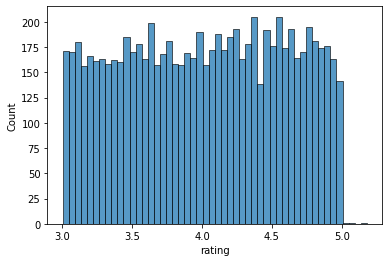

In [ ]:
# Visualize the distribution of the rating column using seaborn sns
sns.histplot(airbnb['rating'],bins=50)
# we can se that there are a couple of values higher than 5 that is the maximum number of stars so this needs to be cleaned

# Using the missingno library we can visualise the missing number and allows us to give a bird's eye view of where the missing rows are in the data set

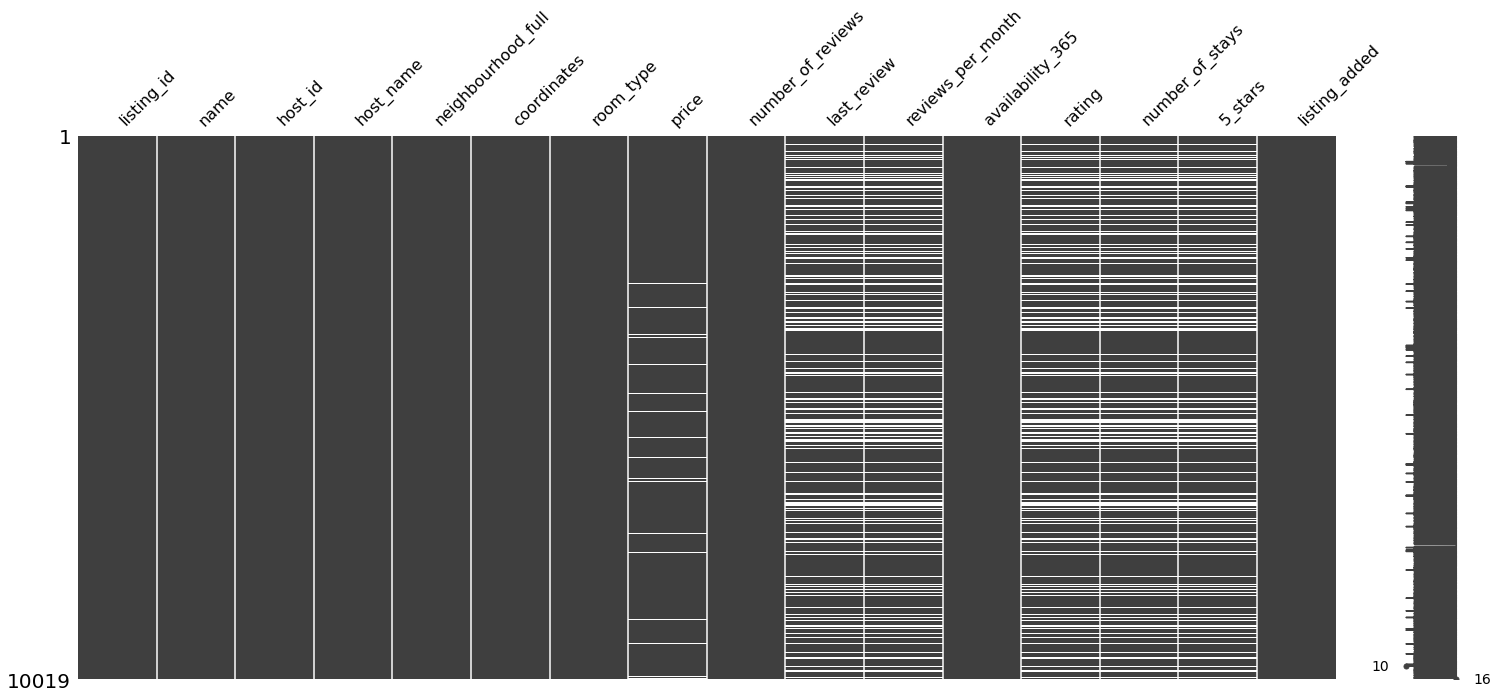

In [ ]:
# Visualize the missingness using the missingno package we can see the white lines represent missing values 
msno.matrix(airbnb)
plt.show()

<AxesSubplot:>

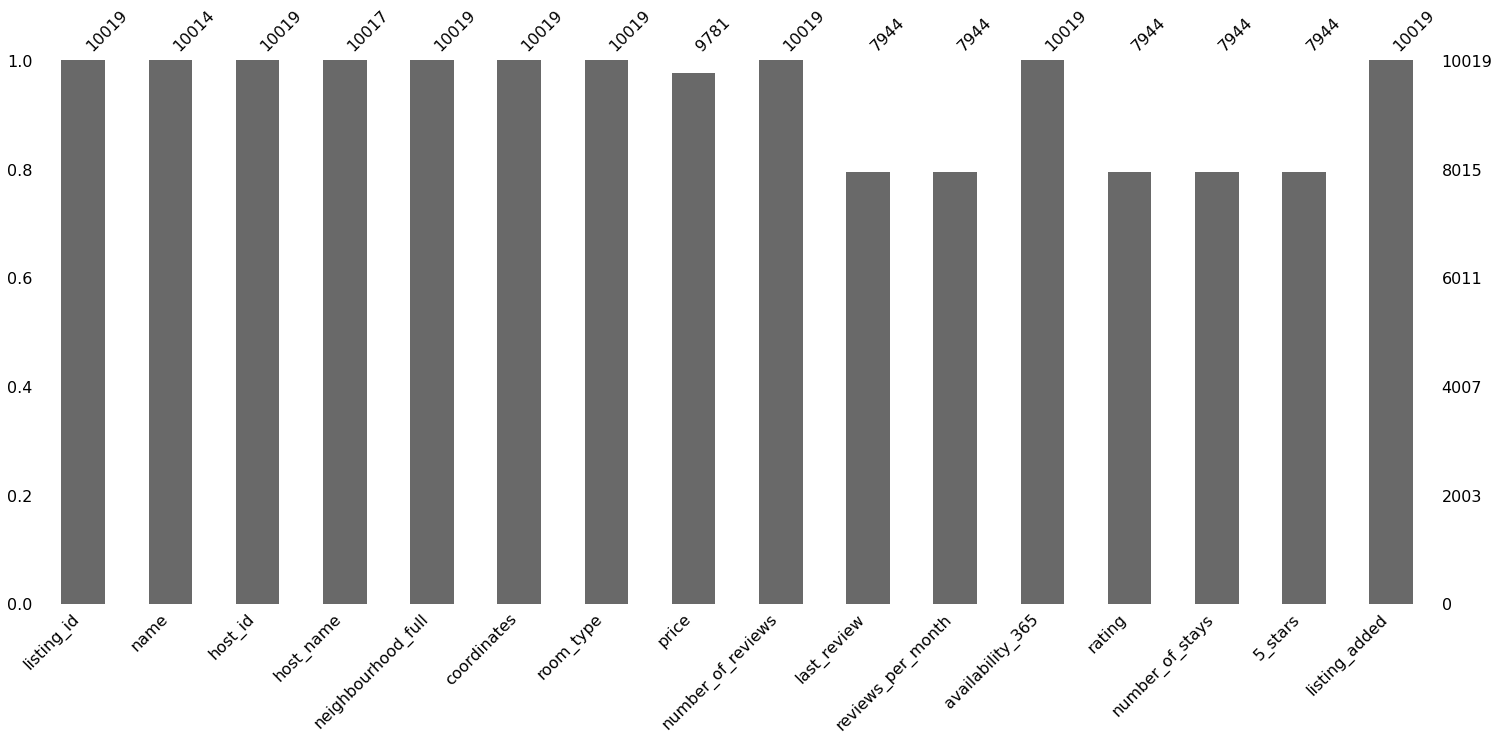

In [ ]:
# Missingness barplot to visualize the missing values we can see the correlation when there is no rating we miss a lot of other columns
msno.bar(airbnb)

# Check for the categorical values to find out unique values.

In [ ]:
# Find number of unique values in room_type column
airbnb['room_type'].unique()
# here we can identify that there are typos or different spellings for the same room types so this needs to be cleaned

array(['Private room', 'Entire home/apt', 'Private', 'Shared room',
       'PRIVATE ROOM', 'home', '   Shared room      '], dtype=object)

# Let's see the correlation for the numerical values we have at the moment


In [ ]:
# correlation matrix
airbnb.corr()

,listing_id,host_id,number_of_reviews,reviews_per_month,availability_365,rating,number_of_stays,5_stars
listing_id,1.000000,0.582267,-0.330529,0.291109,0.084118,0.003807,-0.343062,-0.065638
host_id,0.582267,1.000000,-0.143701,0.304325,0.206653,0.002480,-0.147492,-0.023965
number_of_reviews,-0.330529,-0.143701,1.000000,0.544163,0.169073,-0.002988,1.000000,0.152796
reviews_per_month,0.291109,0.304325,0.544163,1.000000,0.182557,0.012128,0.544163,0.147925
availability_365,0.084118,0.206653,0.169073,0.182557,1.000000,-0.014003,0.190325,0.037190
rating,0.003807,0.002480,-0.002988,0.012128,-0.014003,1.000000,-0.002988,0.362934
number_of_stays,-0.343062,-0.147492,1.000000,0.544163,0.190325,-0.002988,1.000000,0.152796
5_stars,-0.065638,-0.023965,0.152796,0.147925,0.037190,0.362934,0.152796,1.000000


# Now I can start filtering and cleaning our data

In [ ]:
#let's list the columns
airbnb.columns

Index(['listing_id', 'name', 'host_id', 'host_name', 'neighbourhood_full',
       'coordinates', 'room_type', 'price', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'availability_365', 'rating', 'number_of_stays',
       '5_stars', 'listing_added'],
      dtype='object')

In [ ]:
# Doing a copy as I am cleaning/ manipulating the dataset
airbnb_clean=airbnb.copy() 

# Cleaning duplicates

In [ ]:
# Find duplicates
duplicates= airbnb_clean.duplicated(subset='listing_id', keep=False)# the part keep=False is for pyton not to drop the duplicates
print(duplicates.value_counts()) # this part of code is to show you how many non duplicates and how many duplicates or True
# so we have 40 duplicated values

False    9979
True       40
dtype: int64


In [ ]:
# Show duplicates in a table and sorting them
airbnb_clean[duplicates].sort_values('listing_id')

,listing_id,name,host_id,host_name,neighbourhood_full,coordinates,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added
1145,253806,Loft Suite @ The Box House Hotel,417504,The Box House Hotel,"Brooklyn, Greenpoint","(40.73652, -73.95236)",Entire home/apt,199$,43,2019-07-02,0.47,60,4.620238,51.6,0.861086,2018-12-27
6562,253806,Loft Suite @ The Box House Hotel,417504,The Box House Hotel,"Brooklyn, Greenpoint","(40.73652, -73.95236)",Entire home/apt,199$,43,2019-07-02,0.47,60,4.620238,51.6,0.861086,2018-12-27
8699,2044392,The heart of Williamsburg 2 bedroom,620218,Sarah,"Brooklyn, Williamsburg","(40.71257, -73.96149)",Entire home/apt,245$,0,NaN,NaN,0,NaN,NaN,NaN,2018-08-09
5761,2044392,The heart of Williamsburg 2 bedroom,620218,Sarah,"Brooklyn, Williamsburg","(40.71257, -73.96149)",Entire home/apt,250$,0,NaN,NaN,0,NaN,NaN,NaN,2018-05-24
4187,4244242,Best Bedroom in Bedstuy/Bushwick. Ensuite bath...,22023014,BrooklynSleeps,"Brooklyn, Bedford-Stuyvesant","(40.69496, -73.93949)",Private room,73$,110,2019-06-23,1.96,323,4.962314,132.0,0.809882,2018-12-18
2871,4244242,Best Bedroom in Bedstuy/Bushwick. Ensuite bath...,22023014,BrooklynSleeps,"Brooklyn, Bedford-Stuyvesant","(40.69496, -73.93949)",Private room,70$,110,2019-06-23,1.96,323,4.962314,132.0,0.809882,2018-12-18
77,7319856,450ft Square Studio in Gramercy NY,11773680,Adam,"Manhattan, Kips Bay","(40.73813, -73.98098)",Entire home/apt,289$,4,2016-05-22,0.09,225,3.903764,4.8,0.756381,2015-11-17
2255,7319856,450ft Square Studio in Gramercy NY,11773680,Adam,"Manhattan, Kips Bay","(40.73813, -73.98098)",Entire home/apt,280$,4,2016-05-22,0.09,225,3.903764,4.8,0.756381,2015-11-17
555,9078222,"Prospect Park 3 bdrm, Sleeps 8 (#2)",47219962,Babajide,"Brooklyn, Prospect-Lefferts Gardens","(40.66086, -73.96159)",Entire home/apt,154$,123,2019-07-01,2.74,263,3.466881,147.6,0.738191,2018-12-26
7933,9078222,"Prospect Park 3 bdrm, Sleeps 8 (#2)",47219962,Babajide,"Brooklyn, Prospect-Lefferts Gardens","(40.66086, -73.96159)",Entire home/apt,150$,123,2019-07-01,2.74,263,3.466881,147.6,0.738191,2018-12-26


In [ ]:
# Find only exact duplicates so all the column values are identycal
airbnb_clean.duplicated(keep=False)# the part keep=False is for pyton not to drop the duplicates
print(duplicates.value_counts()) # this part of code is to show you how many non duplicates and how many duplicates or True
# we have 26 excat duplicates we can delete them

False    9979
True       40
dtype: int64


In [ ]:
# now let's delete the exact duplicates
airbnb_clean.drop_duplicates(subset='listing_id')

,listing_id,name,host_id,host_name,neighbourhood_full,coordinates,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added
0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,"Brooklyn, Flatlands","(40.63222, -73.93398)",Private room,45$,10,2018-12-12,0.70,85,4.100954,12.0,0.609432,2018-06-08
1,22005115,Two floor apartment near Central Park,82746113,Cecilia,"Manhattan, Upper West Side","(40.78761, -73.96862)",Entire home/apt,135$,1,2019-06-30,1.00,145,3.367600,1.2,0.746135,2018-12-25
2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,"Brooklyn, Brooklyn Heights","(40.7007, -73.99517)",Entire home/apt,150$,0,NaN,NaN,65,NaN,NaN,NaN,2018-08-15
3,6425850,"Spacious, charming studio",32715865,Yelena,"Manhattan, Upper West Side","(40.79169, -73.97498)",Entire home/apt,86$,5,2017-09-23,0.13,0,4.763203,6.0,0.769947,2017-03-20
4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,"Manhattan, Lower East Side","(40.71884, -73.98354)",Private room,160$,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10014,22307861,Lovely 1BR Harlem apartment,16004068,Rachel,"Manhattan, Harlem","(40.80379, -73.95257)",Entire home/apt,105$,4,2018-05-28,0.21,0,4.757555,4.8,0.639223,2017-11-22
10015,953275,Apartment For Your Holidays in NYC!,4460034,Alain,"Manhattan, East Harlem","(40.79531, -73.9333)",Entire home/apt,125$,50,2018-05-06,0.66,188,4.344704,60.0,0.648778,2017-10-31
10016,3452835,"Artsy, Garden Getaway in Central Brooklyn",666862,Amy,"Brooklyn, Clinton Hill","(40.68266, -73.96743000000002)",Entire home/apt,100$,45,2016-11-27,0.98,0,3.966214,54.0,0.631713,2016-05-24
10017,23540194,"Immaculate townhouse in Clinton Hill, Brooklyn",67176930,Sophie,"Brooklyn, Clinton Hill","(40.68832, -73.96366)",Entire home/apt,450$,2,2019-05-31,0.17,99,4.078581,2.4,0.703360,2018-11-25


In [ ]:
# Find only exact duplicates so all the column values are identycal
duplicates= airbnb_clean.duplicated(keep=False)# the part keep=False is for pyton not to drop the duplicates
print(duplicates.value_counts()) # this part of code is to show you how many non duplicates and how many duplicates or True
# we have 26 excat duplicates we can delete them

False    9993
True       26
dtype: int64


# Converting the price column into a number 

In [ ]:
# Now we are going to start cleaning the data
# we will convert all prices into dollars

#1. check if we have null values for price
airbnb_clean['price'].isnull().sum() # we have 238 null values
#2. Remove the $ 
airbnb_clean['price']=airbnb_clean['price'].str.strip("$")
#airbnb.head() # to visualise that we actually removed the $ 
#3. We then convert it from string to numerical (float64)
airbnb_clean['price'] = airbnb_clean['price'].astype('float')
airbnb_clean.head()

,listing_id,name,host_id,host_name,neighbourhood_full,coordinates,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added
0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,"Brooklyn, Flatlands","(40.63222, -73.93398)",Private room,45.0,10,2018-12-12,0.70,85,4.100954,12.0,0.609432,2018-06-08
1,22005115,Two floor apartment near Central Park,82746113,Cecilia,"Manhattan, Upper West Side","(40.78761, -73.96862)",Entire home/apt,135.0,1,2019-06-30,1.00,145,3.367600,1.2,0.746135,2018-12-25
2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,"Brooklyn, Brooklyn Heights","(40.7007, -73.99517)",Entire home/apt,150.0,0,NaN,NaN,65,NaN,NaN,NaN,2018-08-15
3,6425850,"Spacious, charming studio",32715865,Yelena,"Manhattan, Upper West Side","(40.79169, -73.97498)",Entire home/apt,86.0,5,2017-09-23,0.13,0,4.763203,6.0,0.769947,2017-03-20
4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,"Manhattan, Lower East Side","(40.71884, -73.98354)",Private room,160.0,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23


# Split the coordinates column into two new columns Latitude and Longitude

In [ ]:
# now we are going to split the coordenates

#1. Remove the '()'
airbnb_clean['coordinates']=airbnb_clean['coordinates'].str.strip("(")
airbnb_clean['coordinates']=airbnb_clean['coordinates'].str.strip(")")
#2. Split into longitude and latitude using ,
lat_long = airbnb_clean['coordinates'].str.split(",",expand=True)
#print(lat_long)
#3. Create 2 new columns
airbnb_clean['latitude']= lat_long[0]
airbnb_clean['longitude'] = lat_long[1]
#4. Convert them into numbers
airbnb_clean['longitude'] = airbnb_clean['longitude'].astype('float')
airbnb_clean['latitude'] = airbnb_clean['latitude'].astype('float')
#5. Verify our data
airbnb_clean.info()
#6. drop the coordinates column
airbnb_clean = airbnb_clean.drop(labels='coordinates',axis=1)
airbnb_clean.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10019 entries, 0 to 10018
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   listing_id          10019 non-null  int64  
 1   name                10014 non-null  object 
 2   host_id             10019 non-null  int64  
 3   host_name           10017 non-null  object 
 4   neighbourhood_full  10019 non-null  object 
 5   coordinates         10019 non-null  object 
 6   room_type           10019 non-null  object 
 7   price               9781 non-null   float64
 8   number_of_reviews   10019 non-null  int64  
 9   last_review         7944 non-null   object 
 10  reviews_per_month   7944 non-null   float64
 11  availability_365    10019 non-null  int64  
 12  rating              7944 non-null   float64
 13  number_of_stays     7944 non-null   float64
 14  5_stars             7944 non-null   float64
 15  listing_added       10019 non-null  object 
 16  lati

,listing_id,name,host_id,host_name,neighbourhood_full,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude
0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,"Brooklyn, Flatlands",Private room,45.0,10,2018-12-12,0.70,85,4.100954,12.0,0.609432,2018-06-08,40.63222,-73.93398
1,22005115,Two floor apartment near Central Park,82746113,Cecilia,"Manhattan, Upper West Side",Entire home/apt,135.0,1,2019-06-30,1.00,145,3.367600,1.2,0.746135,2018-12-25,40.78761,-73.96862
2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,"Brooklyn, Brooklyn Heights",Entire home/apt,150.0,0,NaN,NaN,65,NaN,NaN,NaN,2018-08-15,40.70070,-73.99517
3,6425850,"Spacious, charming studio",32715865,Yelena,"Manhattan, Upper West Side",Entire home/apt,86.0,5,2017-09-23,0.13,0,4.763203,6.0,0.769947,2017-03-20,40.79169,-73.97498
4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,"Manhattan, Lower East Side",Private room,160.0,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23,40.71884,-73.98354


# Split the cooridinates column onto two new columns borough and suburb

In [ ]:
# now we are going to split the neighborhood into suburb and borough
#1. split by ","
sub_bor = airbnb_clean['neighbourhood_full'].str.split(",",expand=True)
print(sub_bor)
#2. create two new columns
airbnb_clean['borough']= sub_bor[0]
airbnb_clean['suburb'] = sub_bor[1]
airbnb_clean.head()
#3. verify if we have 5 borough by using value_counts()
airbnb_clean['borough'].value_counts()
# no typos to fix
#4 Drop the neighbourhood_full column
airbnb_clean = airbnb_clean.drop(labels='neighbourhood_full',axis=1)
airbnb_clean.head()

               0                  1
0       Brooklyn          Flatlands
1      Manhattan    Upper West Side
2       Brooklyn   Brooklyn Heights
3      Manhattan    Upper West Side
4      Manhattan    Lower East Side
...          ...                ...
10014  Manhattan             Harlem
10015  Manhattan        East Harlem
10016   Brooklyn       Clinton Hill
10017   Brooklyn       Clinton Hill
10018  Manhattan    Upper East Side

[10019 rows x 2 columns]


,listing_id,name,host_id,host_name,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude,borough,suburb
0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,Private room,45.0,10,2018-12-12,0.70,85,4.100954,12.0,0.609432,2018-06-08,40.63222,-73.93398,Brooklyn,Flatlands
1,22005115,Two floor apartment near Central Park,82746113,Cecilia,Entire home/apt,135.0,1,2019-06-30,1.00,145,3.367600,1.2,0.746135,2018-12-25,40.78761,-73.96862,Manhattan,Upper West Side
2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,Entire home/apt,150.0,0,NaN,NaN,65,NaN,NaN,NaN,2018-08-15,40.70070,-73.99517,Brooklyn,Brooklyn Heights
3,6425850,"Spacious, charming studio",32715865,Yelena,Entire home/apt,86.0,5,2017-09-23,0.13,0,4.763203,6.0,0.769947,2017-03-20,40.79169,-73.97498,Manhattan,Upper West Side
4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,Private room,160.0,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23,40.71884,-73.98354,Manhattan,Lower East Side


# Clean the values for the column room_type in three different types

In [ ]:
#Lets visualise how many variations for the 3 main room types there are
airbnb_clean['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Private', 'Shared room',
       'PRIVATE ROOM', 'home', '   Shared room      '], dtype=object)

In [ ]:
# Now we are going to clean the values for the column room_type 
# we decided that in general there are 3 room types Private Room, Shared Room and Entire House
#1. we are replacing all the diferent names for private room 'PRIVATE ROOM' and 'Private' to 'Private room'
airbnb_clean['room_type'] = airbnb_clean['room_type'].where(airbnb_clean['room_type'] !='PRIVATE ROOM', 'Private Room')
airbnb_clean['room_type'] = airbnb_clean['room_type'].where(airbnb_clean['room_type'] !='Private room', 'Private Room')
airbnb_clean['room_type'] = airbnb_clean['room_type'].where(airbnb_clean['room_type'] !='Private', 'Private Room')
#2. now we are replacing all the diferent names for Shared room 'Shared room' and '   Shared room      ' to 'Shared room'
airbnb_clean['room_type'] = airbnb_clean['room_type'].where(airbnb_clean['room_type'] !='   Shared room      ', 'Shared Room')
airbnb_clean['room_type'] = airbnb_clean['room_type'].where(airbnb_clean['room_type'] !='Shared room', 'Shared Room')
#3. now we are replacing all the diferent names for entire homes 'Entire home/apt' and 'home' to 'Entire house'
airbnb_clean['room_type'] = airbnb_clean['room_type'].where(airbnb_clean['room_type'] !='Entire home/apt', 'Entire House')
airbnb_clean['room_type'] = airbnb_clean['room_type'].where(airbnb_clean['room_type'] !='home', 'Entire House')
# lets check now the values in the room type column to see that there are only 3 categories
airbnb_clean.head()

,listing_id,name,host_id,host_name,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude,borough,suburb
0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,Private Room,45.0,10,2018-12-12,0.70,85,4.100954,12.0,0.609432,2018-06-08,40.63222,-73.93398,Brooklyn,Flatlands
1,22005115,Two floor apartment near Central Park,82746113,Cecilia,Entire House,135.0,1,2019-06-30,1.00,145,3.367600,1.2,0.746135,2018-12-25,40.78761,-73.96862,Manhattan,Upper West Side
2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,Entire House,150.0,0,NaN,NaN,65,NaN,NaN,NaN,2018-08-15,40.70070,-73.99517,Brooklyn,Brooklyn Heights
3,6425850,"Spacious, charming studio",32715865,Yelena,Entire House,86.0,5,2017-09-23,0.13,0,4.763203,6.0,0.769947,2017-03-20,40.79169,-73.97498,Manhattan,Upper West Side
4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,Private Room,160.0,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23,40.71884,-73.98354,Manhattan,Lower East Side


In [ ]:
#Lets confirm that we only have 3 room types here now
airbnb_clean['room_type'].unique()

array(['Private Room', 'Entire House', 'Shared Room'], dtype=object)

# let's convert columns with dtype object into a category

In [ ]:
# Here im converting the values in this columns as category so the model can use them
airbnb_clean['room_type'] = pd.Categorical(airbnb_clean['room_type'])
airbnb_clean['borough'] = pd.Categorical(airbnb_clean['borough'])
airbnb_clean['suburb'] = pd.Categorical(airbnb_clean['suburb'])
airbnb_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10019 entries, 0 to 10018
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   listing_id         10019 non-null  int64   
 1   name               10014 non-null  object  
 2   host_id            10019 non-null  int64   
 3   host_name          10017 non-null  object  
 4   room_type          10019 non-null  category
 5   price              9781 non-null   float64 
 6   number_of_reviews  10019 non-null  int64   
 7   last_review        7944 non-null   object  
 8   reviews_per_month  7944 non-null   float64 
 9   availability_365   10019 non-null  int64   
 10  rating             7944 non-null   float64 
 11  number_of_stays    7944 non-null   float64 
 12  5_stars            7944 non-null   float64 
 13  listing_added      10019 non-null  object  
 14  latitude           10019 non-null  float64 
 15  longitude          10019 non-null  float64 
 16  boro

In [ ]:
# Here im copying the 5_Star column with a different name so we can use it in the model
airbnb_clean['fivestars']= airbnb_clean['5_stars']
airbnb_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10019 entries, 0 to 10018
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   listing_id         10019 non-null  int64   
 1   name               10014 non-null  object  
 2   host_id            10019 non-null  int64   
 3   host_name          10017 non-null  object  
 4   room_type          10019 non-null  category
 5   price              9781 non-null   float64 
 6   number_of_reviews  10019 non-null  int64   
 7   last_review        7944 non-null   object  
 8   reviews_per_month  7944 non-null   float64 
 9   availability_365   10019 non-null  int64   
 10  rating             7944 non-null   float64 
 11  number_of_stays    7944 non-null   float64 
 12  5_stars            7944 non-null   float64 
 13  listing_added      10019 non-null  object  
 14  latitude           10019 non-null  float64 
 15  longitude          10019 non-null  float64 
 16  boro

# Delete columns we are not going to use 

In [ ]:
#let's drop some columns that we consider unncesary
airbnb_clean= airbnb_clean.drop(['name','host_id','host_name','5_stars','last_review'],axis=1) 
airbnb_clean.head() 

,listing_id,room_type,price,number_of_reviews,reviews_per_month,availability_365,rating,number_of_stays,listing_added,latitude,longitude,borough,suburb,fivestars
0,13740704,Private Room,45.0,10,0.70,85,4.100954,12.0,2018-06-08,40.63222,-73.93398,Brooklyn,Flatlands,0.609432
1,22005115,Entire House,135.0,1,1.00,145,3.367600,1.2,2018-12-25,40.78761,-73.96862,Manhattan,Upper West Side,0.746135
2,21667615,Entire House,150.0,0,NaN,65,NaN,NaN,2018-08-15,40.70070,-73.99517,Brooklyn,Brooklyn Heights,NaN
3,6425850,Entire House,86.0,5,0.13,0,4.763203,6.0,2017-03-20,40.79169,-73.97498,Manhattan,Upper West Side,0.769947
4,22986519,Private Room,160.0,23,2.29,102,3.822591,27.6,2020-10-23,40.71884,-73.98354,Manhattan,Lower East Side,0.649383


# Now I can start dealing with the missing values

In [ ]:
# visualising the missing values from the clean data
airbnb_clean.isnull().sum()

listing_id              0
room_type               0
price                 238
number_of_reviews       0
reviews_per_month    2075
availability_365        0
rating               2075
number_of_stays      2075
listing_added           0
latitude                0
longitude               0
borough                 0
suburb                  0
fivestars            2075
dtype: int64

# We have 238 values for price missing let's see if we can replace them

In [ ]:
from pandas.core.groupby.groupby import GroupBy
# checking for room type the price median so we can use that for the 238 null values we have for price
airbnb_clean.groupby(["room_type"]).median()

,listing_id,price,number_of_reviews,reviews_per_month,availability_365,rating,number_of_stays,latitude,longitude,fivestars
room_type,,,,,,,,,,
Entire House,19347884.0,163.0,5.0,0.645,41.0,4.029362,10.8,40.72709,-73.965195,0.709389
Private Room,20503824.0,70.0,5.0,0.760,44.0,4.029004,12.0,40.71753,-73.947750,0.710508
Shared Room,26964114.5,50.0,4.0,1.000,102.0,4.001926,9.6,40.74425,-73.953660,0.708243


In [ ]:
# I will create more variables for the mean price for each room type
median_price_eh = airbnb_clean[airbnb_clean['room_type']=='Entire House'].price.mean()
median_price_pr = airbnb_clean[airbnb_clean['room_type']=='Private Room'].price.mean()
median_price_sr = airbnb_clean[airbnb_clean['room_type']=='Shared Room'].price.mean()
# here i am replacing the mean price for the null values 
airbnb_clean.loc[(airbnb_clean['room_type'] == 'Entire House') & (airbnb_clean['price'].isnull()), 'price'] = median_price_eh
airbnb_clean.loc[(airbnb_clean['room_type'] == 'Private Room') & (airbnb_clean['price'].isnull()), 'price'] = median_price_pr
airbnb_clean.loc[(airbnb_clean['room_type'] == 'Shared Room') & (airbnb_clean['price'].isnull()), 'price'] = median_price_sr
#checking that it actually worked as we can see now we don't have null values for price
airbnb_clean['price'].isnull().sum()

0

In [ ]:
# here I need to solve the problem of having ratings greater than the maximun 5
# 1. Visualising the rows with ratings higher than 5 
airbnb_clean.query("`rating`>5")
# I will assume that the raiting should be 5 and replace them
airbnb_clean.at[1925,'rating'] =5
airbnb_clean.at[6732,'rating'] =5
airbnb_clean.at[8821,'rating'] =5
# lets visualise that we replaced those values higher than 5
airbnb_clean.query("`rating`>5")

,listing_id,room_type,price,number_of_reviews,reviews_per_month,availability_365,rating,number_of_stays,listing_added,latitude,longitude,borough,suburb,fivestars


In [ ]:
# Now we only have the 2075 missing values that are in comon for the reviews_per_month,rating,number_of_stays and 5_stars
airbnb_clean.isnull().sum()

listing_id              0
room_type               0
price                   0
number_of_reviews       0
reviews_per_month    2075
availability_365        0
rating               2075
number_of_stays      2075
listing_added           0
latitude                0
longitude               0
borough                 0
suburb                  0
fivestars            2075
dtype: int64

# Delete null rows?

In [ ]:
# I will try to delete those rows to see what may happen if we do a model it may negatively impact the 
# performance as is about 20% of the data
airbnb_clean= airbnb_clean.dropna()
airbnb_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7944 entries, 0 to 10018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   listing_id         7944 non-null   int64   
 1   room_type          7944 non-null   category
 2   price              7944 non-null   float64 
 3   number_of_reviews  7944 non-null   int64   
 4   reviews_per_month  7944 non-null   float64 
 5   availability_365   7944 non-null   int64   
 6   rating             7944 non-null   float64 
 7   number_of_stays    7944 non-null   float64 
 8   listing_added      7944 non-null   object  
 9   latitude           7944 non-null   float64 
 10  longitude          7944 non-null   float64 
 11  borough            7944 non-null   category
 12  suburb             7944 non-null   category
 13  fivestars          7944 non-null   float64 
dtypes: category(3), float64(7), int64(3), object(1)
memory usage: 785.8+ KB


# We have 2075 values missing related to each other so i want to group by room type and get the mean or median rating for each room type to input the missing values

In [ ]:
# getting the mean and median rating per room type using gropby
airbnb_clean.groupby('room_type').agg({'rating': ['mean','median']})

rating          
                  mean    median
room_type                       
Entire House  4.017095  4.029362
Private Room  4.013103  4.029004
Shared Room   3.976930  4.001926

In [ ]:
# I will create more variables for the mean raiting for each room type
#meanr_eh = airbnb_clean[airbnb_clean['room_type']=='Entire House'].rating.mean()
#meanr_pr = airbnb_clean[airbnb_clean['room_type']=='Private Room'].rating.mean()
#meanr_sr = airbnb_clean[airbnb_clean['room_type']=='Shared Room'].rating.mean()
# here i am replacing the mean rating for the null values 
#airbnb_clean.loc[(airbnb_clean['room_type'] == 'Entire House') & (airbnb_clean['rating'].isnull()), 'rating'] = meanr_eh
#airbnb_clean.loc[(airbnb_clean['room_type'] == 'Private Room') & (airbnb_clean['rating'].isnull()), 'rating'] = meanr_pr
#airbnb_clean.loc[(airbnb_clean['room_type'] == 'Shared Room') & (airbnb_clean['rating'].isnull()), 'rating'] = meanr_sr
#checking that it actually worked as we can see now we don't have null values for price
#airbnb_clean['rating'].isnull().sum()

In [ ]:
#Visualize
airbnb_clean.isnull().sum()

listing_id           0
room_type            0
price                0
number_of_reviews    0
reviews_per_month    0
availability_365     0
rating               0
number_of_stays      0
listing_added        0
latitude             0
longitude            0
borough              0
suburb               0
fivestars            0
dtype: int64

In [ ]:
# getting the mean and median ratings of 5 stars per room type using gropby
airbnb_clean.groupby('room_type').agg({'fivestars': ['mean','median']})

fivestars          
                  mean    median
room_type                       
Entire House  0.718503  0.709389
Private Room  0.719001  0.710508
Shared Room   0.712412  0.708243

In [ ]:
# I will create more variables for the mean 5 star rating for each room type
mean5_eh = airbnb_clean[airbnb_clean['room_type']=='Entire House'].fivestars.mean()
mean5_pr = airbnb_clean[airbnb_clean['room_type']=='Private Room'].fivestars.mean()
mean5_sr = airbnb_clean[airbnb_clean['room_type']=='Shared Room'].fivestars.mean()
# here i am replacing the mean 5 stars rating for the null values 
airbnb_clean.loc[(airbnb_clean['room_type'] == 'Entire House') & (airbnb_clean['fivestars'].isnull()), 'fivestars'] = mean5_eh
airbnb_clean.loc[(airbnb_clean['room_type'] == 'Private Room') & (airbnb_clean['fivestars'].isnull()), 'fivestars'] = mean5_pr
airbnb_clean.loc[(airbnb_clean['room_type'] == 'Shared Room') & (airbnb_clean['fivestars'].isnull()), 'fivestars'] = mean5_sr
#checking that it actually worked as we can see now we don't have null values for price
airbnb_clean['fivestars'].isnull().sum()

0

In [ ]:
# Visualize
airbnb_clean.isnull().sum()

listing_id           0
room_type            0
price                0
number_of_reviews    0
reviews_per_month    0
availability_365     0
rating               0
number_of_stays      0
listing_added        0
latitude             0
longitude            0
borough              0
suburb               0
fivestars            0
dtype: int64

In [ ]:
# getting the mean and median reviews per month per room type using gropby
airbnb_clean.groupby('room_type').agg({'reviews_per_month': ['mean','median','max','min']})

reviews_per_month                    
                          mean median    max   min
room_type                                         
Entire House          1.299945  0.645  11.25  0.01
Private Room          1.407907  0.760  16.22  0.01
Shared Room           1.529588  1.000   9.13  0.04

In [ ]:
# I will create more variables for the mean reviews per month for each room type
meanrm_eh = airbnb_clean[airbnb_clean['room_type']=='Entire House'].reviews_per_month.mean()
meanrm_pr = airbnb_clean[airbnb_clean['room_type']=='Private Room'].reviews_per_month.mean()
meanrm_sr = airbnb_clean[airbnb_clean['room_type']=='Shared Room'].reviews_per_month.mean()
# here i am replacing the mean 5 stars rating for the null values 
airbnb_clean.loc[(airbnb_clean['room_type'] == 'Entire House') & (airbnb_clean['reviews_per_month'].isnull()), 'reviews_per_month'] = meanrm_eh
airbnb_clean.loc[(airbnb_clean['room_type'] == 'Private Room') & (airbnb_clean['reviews_per_month'].isnull()), 'reviews_per_month'] = meanrm_pr
airbnb_clean.loc[(airbnb_clean['room_type'] == 'Shared Room') & (airbnb_clean['reviews_per_month'].isnull()), 'reviews_per_month'] = meanrm_sr
#checking that it actually worked as we can see now we don't have null values for price
airbnb_clean['reviews_per_month'].isnull().sum()

0

In [ ]:
# Visualize
airbnb_clean.isnull().sum()

listing_id           0
room_type            0
price                0
number_of_reviews    0
reviews_per_month    0
availability_365     0
rating               0
number_of_stays      0
listing_added        0
latitude             0
longitude            0
borough              0
suburb               0
fivestars            0
dtype: int64

In [ ]:
# I will create more variables for the mean number of stays for each room type
meanns_eh = airbnb_clean[airbnb_clean['room_type']=='Entire House'].number_of_stays.mean()
meanns_pr = airbnb_clean[airbnb_clean['room_type']=='Private Room'].number_of_stays.mean()
meanns_sr = airbnb_clean[airbnb_clean['room_type']=='Shared Room'].number_of_stays.mean()
# here i am replacing the mean 5 stars rating for the null values 
airbnb_clean.loc[(airbnb_clean['room_type'] == 'Entire House') & (airbnb_clean['number_of_stays'].isnull()), 'number_of_stays'] = meanns_eh
airbnb_clean.loc[(airbnb_clean['room_type'] == 'Private Room') & (airbnb_clean['number_of_stays'].isnull()), 'number_of_stays'] = meanns_pr
airbnb_clean.loc[(airbnb_clean['room_type'] == 'Shared Room') & (airbnb_clean['number_of_stays'].isnull()), 'number_of_stays'] = meanns_sr
#checking that it actually worked as we can see now we don't have null values for price
airbnb_clean['number_of_stays'].isnull().sum()

0

In [ ]:
# Visualize
airbnb_clean.info()
# Now we don't have any null data we can do the model and check the performance

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7944 entries, 0 to 10018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   listing_id         7944 non-null   int64   
 1   room_type          7944 non-null   category
 2   price              7944 non-null   float64 
 3   number_of_reviews  7944 non-null   int64   
 4   reviews_per_month  7944 non-null   float64 
 5   availability_365   7944 non-null   int64   
 6   rating             7944 non-null   float64 
 7   number_of_stays    7944 non-null   float64 
 8   listing_added      7944 non-null   object  
 9   latitude           7944 non-null   float64 
 10  longitude          7944 non-null   float64 
 11  borough            7944 non-null   category
 12  suburb             7944 non-null   category
 13  fivestars          7944 non-null   float64 
dtypes: category(3), float64(7), int64(3), object(1)
memory usage: 785.8+ KB


# Now that we cleaned the data we can build the regression model

In [ ]:
# Multiple linear regression
import statsmodels.formula.api as smf
# Part 1: This code is to create a multiple linear regression model

formula_multiple = "price ~  + room_type + rating  + borough + suburb + number_of_stays" 

# Create a training data set using 70% of the data
training_data = airbnb_clean.sample(frac=0.7)

# Create a testing data set with the remaining 20% of the data
testing_data = airbnb_clean.drop(training_data.index)

mlr_model = smf.ols(formula = "price ~  + room_type + rating  + borough + suburb + number_of_stays" , data=training_data).fit()


print("R²: " + str(mlr_model.rsquared))

R²: 0.16412786737559915


In [ ]:
  from sklearn.metrics import mean_absolute_error, mean_squared_error
  import sklearn.metrics as metrics
  from math import sqrt
  # making predictions with the testing data
  predictions = mlr_model.predict(testing_data)
  # Calculate the Mean Absolute Error (MAE)
  mae = metrics.mean_absolute_error(testing_data['price'], predictions)
  print("Mean Absolute Error: ", mae)
  # Calculate the Mean Squared Error (MAE)
  mse = metrics.mean_squared_error(testing_data['price'], predictions)
  print("Mean Squared Error: ", mse)
  # Calculate the Root Mean Squared Error (MAE)
  rmse = sqrt(mse)
  print("Root Mean Squared Error: ", rmse)

Mean Absolute Error:  56.81055937538485
Mean Squared Error:  14651.081457230708
Root Mean Squared Error:  121.04165174530091
